In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from math import radians, sin, cos, sqrt, atan2

%matplotlib inline

In [2]:
df = pd.read_csv('../data/gps.csv')
df.head(3)

,Id,Longitude,Latitude,Accuracy,TimeStamp,Date,DateTime,IsGPSOn,BatLevel,Provider,Bearing,DeviceTime,RepId
0,883873960,80.55590,7.16898,2.3,1695694012000,26/09/2023 12:00:00 AM,26/09/2023 2:06:52 AM,True,0,gps,124.15,26/09/2023 7:36:54 AM,395
1,883873961,80.55589,7.16899,2.1,1695694025000,26/09/2023 12:00:00 AM,26/09/2023 2:07:05 AM,True,0,gps,152.95,26/09/2023 7:37:05 AM,395
2,883874460,80.55589,7.16899,3.6,1695694027676,26/09/2023 12:00:00 AM,26/09/2023 2:07:08 AM,True,0,gps,201.10,26/09/2023 7:37:08 AM,395


In [3]:
def date_time_formating(series):
    return pd.to_datetime(series, format='%d/%m/%Y %I:%M:%S %p')

df['Date'] = date_time_formating(df['Date'])
df['DateTime'] = date_time_formating(df['DateTime'])
df['DeviceTime'] = date_time_formating(df['DeviceTime'])

In [4]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [6]:
df.shape

(29843, 12)

In [7]:
df.columns

Index(['Longitude', 'Latitude', 'Accuracy', 'TimeStamp', 'Date', 'DateTime',
       'IsGPSOn', 'BatLevel', 'Provider', 'Bearing', 'DeviceTime', 'RepId'],
      dtype='object')

In [8]:
gps_data = df[['Longitude','Latitude','DeviceTime']]
gps_data.head()

,Longitude,Latitude,DeviceTime
0,80.55590,7.16898,2023-09-26 07:36:54
1,80.55589,7.16899,2023-09-26 07:37:05
2,80.55589,7.16899,2023-09-26 07:37:08
3,80.55589,7.16899,2023-09-26 07:37:08
4,80.55586,7.16899,2023-09-26 07:37:09


In [9]:
gps_data.drop_duplicates(ignore_index=True, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_13120\3300980695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data.drop_duplicates(ignore_index=True, inplace=True)


In [10]:
gps_data.shape

(29562, 3)

In [11]:
time_duplicates = pd.DataFrame(gps_data.DeviceTime.value_counts())
time_duplicates_df = time_duplicates[time_duplicates['count']>1]
time_duplicates_df.reset_index(inplace=True)
time_duplicates_df

,DeviceTime,count
0,2023-09-26 16:48:52,28
1,2023-09-26 18:09:12,26
2,2023-09-26 10:56:48,16
3,2023-09-26 10:56:47,13
4,2023-09-26 18:09:21,8
...,...,...
536,2023-09-26 08:34:09,2
537,2023-09-26 17:36:11,2
538,2023-09-26 11:34:07,2
539,2023-09-26 11:37:09,2


In [12]:
devicetime_duplicates = gps_data[gps_data['DeviceTime'].isin(time_duplicates_df['DeviceTime'])]
devicetime_duplicates.reset_index(inplace=True)
devicetime_duplicates.head(20)

,index,Longitude,Latitude,DeviceTime
0,77,80.55593,7.16895,2023-09-26 07:38:26
1,78,80.55594,7.16894,2023-09-26 07:38:26
2,120,80.55596,7.16898,2023-09-26 07:39:09
3,121,80.55597,7.16898,2023-09-26 07:39:09
4,232,80.55594,7.16891,2023-09-26 07:41:09
5,233,80.55594,7.16893,2023-09-26 07:41:09
6,291,80.55588,7.16899,2023-09-26 07:42:09
7,292,80.55595,7.16896,2023-09-26 07:42:09
8,293,80.55595,7.16896,2023-09-26 07:42:11
9,294,80.55595,7.16895,2023-09-26 07:42:11


In [13]:
devicetime_duplicates.shape

(1177, 4)

In [14]:
devicetime_duplicates[devicetime_duplicates.DeviceTime == '2023-09-26 16:48:52']

,index,Longitude,Latitude,DeviceTime
891,24766,80.59370,7.22036,2023-09-26 16:48:52
892,24767,80.59370,7.22029,2023-09-26 16:48:52
893,24768,80.59373,7.22023,2023-09-26 16:48:52
894,24769,80.59374,7.22016,2023-09-26 16:48:52
895,24770,80.59374,7.22010,2023-09-26 16:48:52
896,24771,80.59375,7.22005,2023-09-26 16:48:52
897,24772,80.59376,7.21999,2023-09-26 16:48:52
898,24773,80.59377,7.21993,2023-09-26 16:48:52
899,24774,80.59379,7.21987,2023-09-26 16:48:52
900,24775,80.59383,7.21982,2023-09-26 16:48:52


In [15]:
devicetime_duplicates.drop(columns=['index'], axis=1, inplace=True)
devicetime_duplicates.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_13120\2903857546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devicetime_duplicates.drop(columns=['index'], axis=1, inplace=True)


,Longitude,Latitude,DeviceTime
0,80.55593,7.16895,2023-09-26 07:38:26
1,80.55594,7.16894,2023-09-26 07:38:26
2,80.55596,7.16898,2023-09-26 07:39:09
3,80.55597,7.16898,2023-09-26 07:39:09
4,80.55594,7.16891,2023-09-26 07:41:09


In [16]:
unique_time = devicetime_duplicates.groupby(['DeviceTime']).mean()
unique_time.reset_index(inplace=True)
unique_time

,DeviceTime,Longitude,Latitude
0,2023-09-26 07:38:26,80.555935,7.168945
1,2023-09-26 07:39:09,80.555965,7.168980
2,2023-09-26 07:41:09,80.555940,7.168920
3,2023-09-26 07:42:09,80.555915,7.168975
4,2023-09-26 07:42:11,80.555950,7.168955
...,...,...,...
536,2023-09-26 18:25:16,80.556460,7.167525
537,2023-09-26 18:26:15,80.556043,7.169057
538,2023-09-26 18:26:16,80.556070,7.168995
539,2023-09-26 18:27:14,80.555933,7.168990


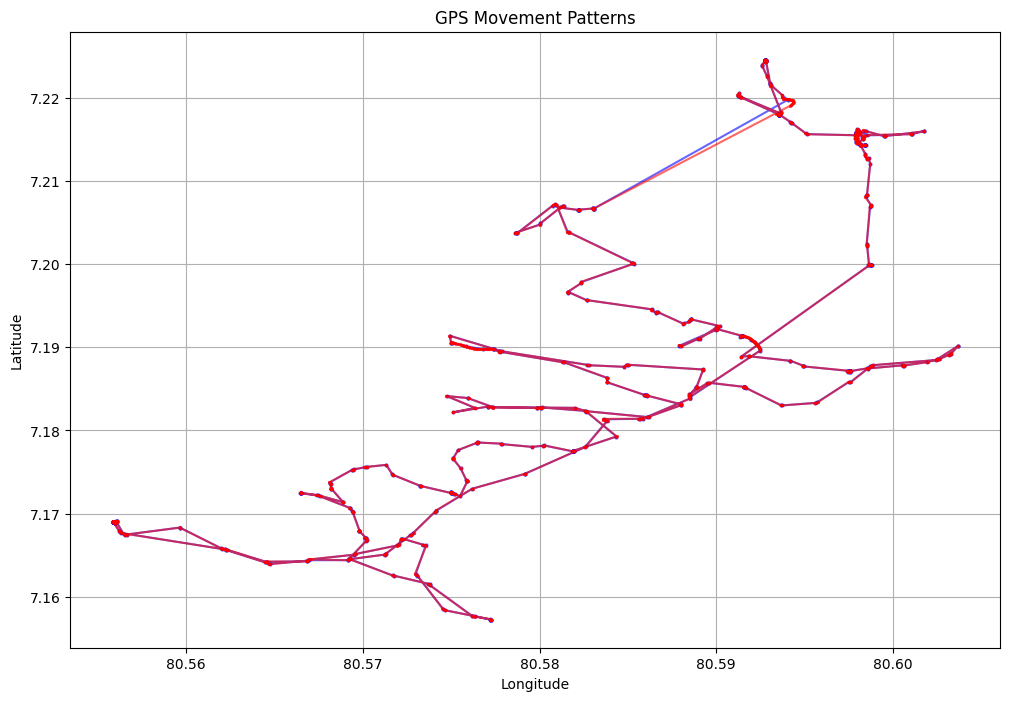

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(unique_time['Longitude'], unique_time['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.plot(devicetime_duplicates['Longitude'], devicetime_duplicates['Latitude'], marker='*', markersize=2, linestyle='-', color='r', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

In [18]:
gps_data_unique = gps_data.groupby(['DeviceTime']).mean()
gps_data_unique.reset_index(inplace=True)
gps_data_unique

,DeviceTime,Longitude,Latitude
0,2023-09-26 07:36:54,80.55590,7.16898
1,2023-09-26 07:37:05,80.55589,7.16899
2,2023-09-26 07:37:08,80.55589,7.16899
3,2023-09-26 07:37:09,80.55586,7.16899
4,2023-09-26 07:37:10,80.55588,7.16900
...,...,...,...
28921,2023-09-26 18:27:20,80.55591,7.16904
28922,2023-09-26 18:27:21,80.55590,7.16903
28923,2023-09-26 18:27:22,80.55589,7.16902
28924,2023-09-26 18:27:23,80.55589,7.16901


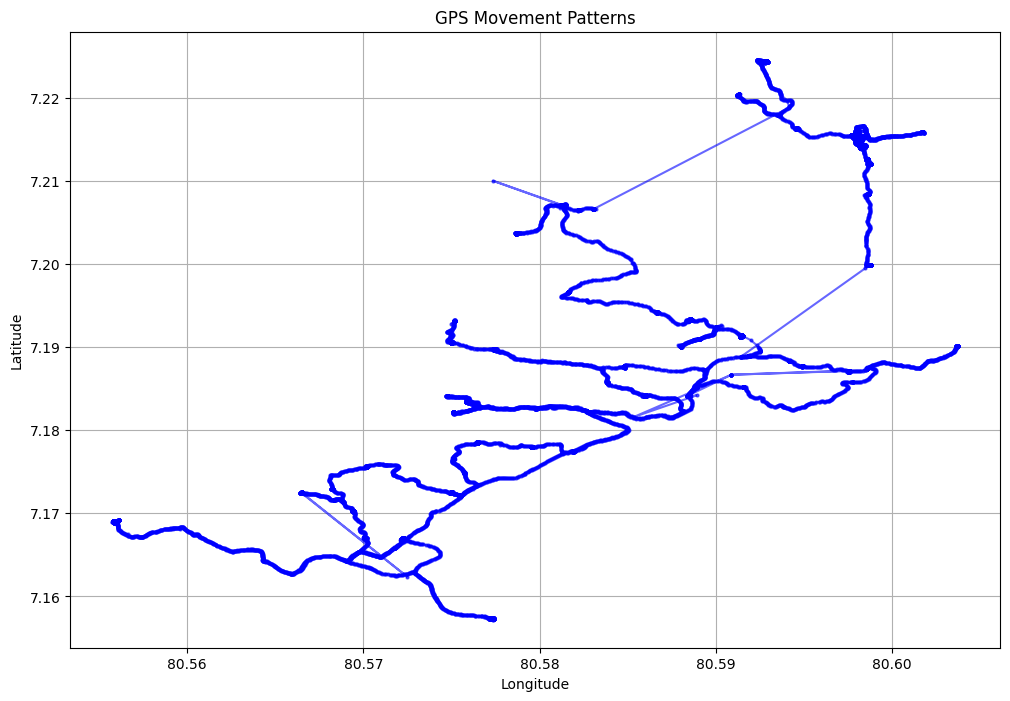

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(gps_data_unique['Longitude'], gps_data_unique['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Movement Patterns')
plt.grid(True)
plt.show()

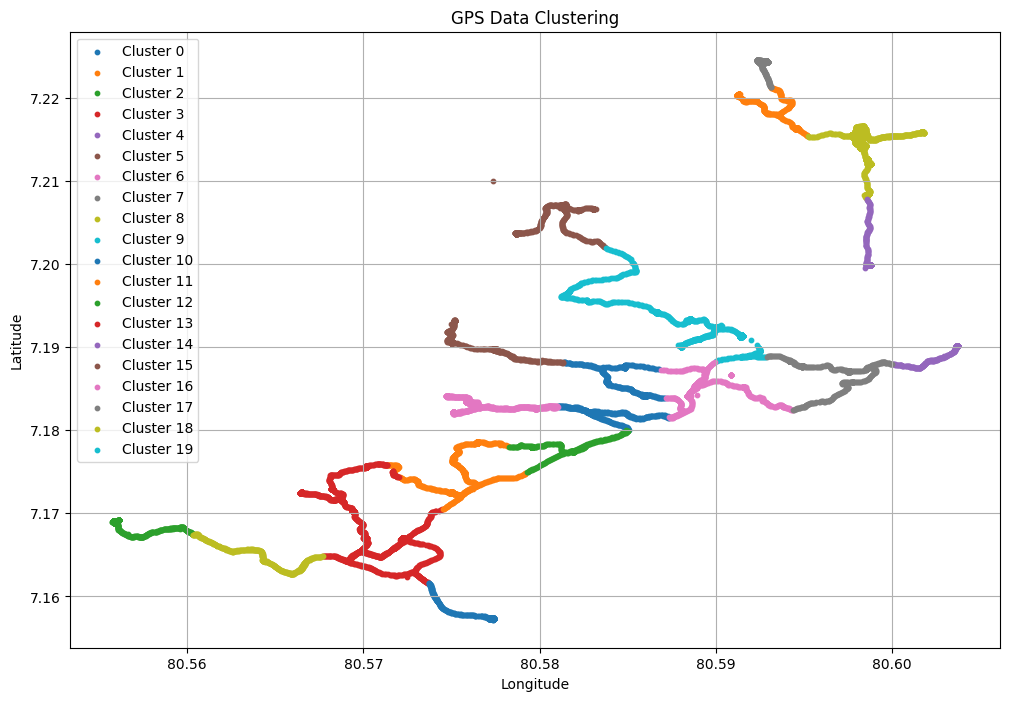

In [20]:
features = gps_data_unique[['Longitude', 'Latitude']]
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
gps_data_unique['Cluster'] = kmeans.fit_predict(features)

# Plot the clustered data
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    clustered_data = gps_data_unique[gps_data_unique['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data Clustering')
plt.legend()
plt.grid(True)
plt.show()

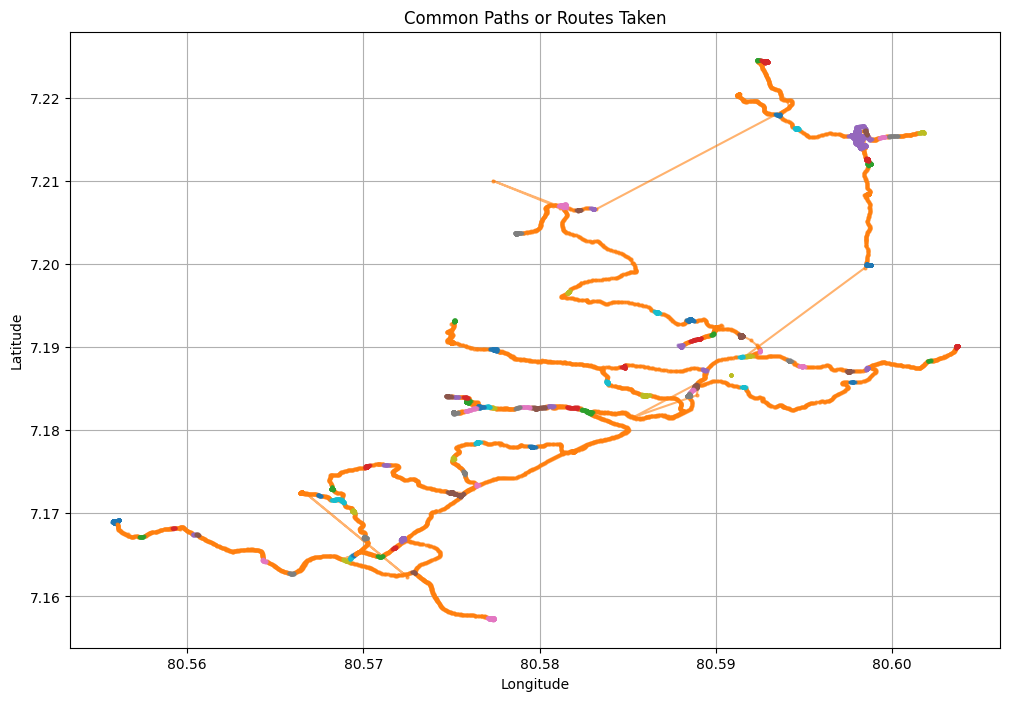

In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Extract relevant features for clustering
features = gps_data_unique[['Longitude', 'Latitude']]

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.0001, min_samples=10)
gps_data_unique['DBSCAN_Cluster'] = dbscan.fit_predict(features)


plt.figure(figsize=(12, 8))
unique_clusters = gps_data_unique['DBSCAN_Cluster'].unique()
for cluster in unique_clusters:
    if cluster == -1:  # Noise
        color = 'k'
        label = 'Noise'
    else:
        color = None
        label = f'Cluster {cluster}'
    clustered_data = gps_data_unique[gps_data_unique['DBSCAN_Cluster'] == cluster]
    plt.plot(clustered_data['Longitude'], clustered_data['Latitude'], marker='o', markersize=2, linestyle='-', label=label, alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Common Paths or Routes Taken')
plt.grid(True)
plt.show()

In [22]:
# Initialize an empty list to store time differences for each cluster
cluster_time_diffs = []

# Iterate through each unique cluster
for cluster in unique_clusters:
    if cluster != -1:  # Ignore noise
        clustered_data = gps_data_unique[gps_data_unique['DBSCAN_Cluster'] == cluster]
        # Calculate time difference in seconds
        time_diff = (clustered_data['DeviceTime'].max() - clustered_data['DeviceTime'].min()).total_seconds()
        cluster_time_diffs.append({'Cluster': cluster, 'TimeDifferenceSeconds': time_diff})

# Convert to DataFrame for easier handling
cluster_time_diffs_df = pd.DataFrame(cluster_time_diffs)

# Display the DataFrame with time differences for each cluster
print(cluster_time_diffs_df)

    Cluster  TimeDifferenceSeconds
0         0                39030.0
1         1                35258.0
2        95                35188.0
3         2                35129.0
4         3                35119.0
..      ...                    ...
91       90                  384.0
92       91                  344.0
93       92                  216.0
94       93                  362.0
95       94                   16.0

[96 rows x 2 columns]


In [23]:
# Initialize an empty list to store staying times for each cluster
cluster_staying_times = []

# Get unique clusters excluding noise
unique_clusters = gps_data_unique['DBSCAN_Cluster'].unique()
unique_clusters = [cluster for cluster in unique_clusters if cluster != -1]

# Iterate through each unique cluster
for cluster in unique_clusters:
    clustered_data = gps_data_unique[gps_data_unique['DBSCAN_Cluster'] == cluster]
    # Calculate time difference in seconds
    staying_time = (clustered_data['DeviceTime'].max() - clustered_data['DeviceTime'].min()).total_seconds()
    cluster_staying_times.append({'Cluster': cluster, 'StayingTimeSeconds': staying_time})

# Convert to DataFrame for easier handling
cluster_staying_times_df = pd.DataFrame(cluster_staying_times)

# Identify stop points with a staying time longer than a threshold (e.g., 300 seconds)
stop_points = cluster_staying_times_df[cluster_staying_times_df['StayingTimeSeconds'] > 1000]

# Display the stop points DataFrame
print(stop_points)

    Cluster  StayingTimeSeconds
0         0             39030.0
1         1             35258.0
2        95             35188.0
3         2             35129.0
4         3             35119.0
5         4             34949.0
6         5             34878.0
7         6             34743.0
8         7             34697.0
9         8             34680.0
10        9             34672.0
11       10             34615.0
12       11             34563.0
24       23             31499.0
25       24             30988.0
30       29             29197.0
31       30             28566.0
53       52             25467.0
54       53             25462.0
55       54             25293.0
56       55             25290.0
57       56              1781.0
67       66             22495.0
68       67             22390.0
73       72              4499.0
81       80              4215.0
82       81              4194.0
85       84              1304.0


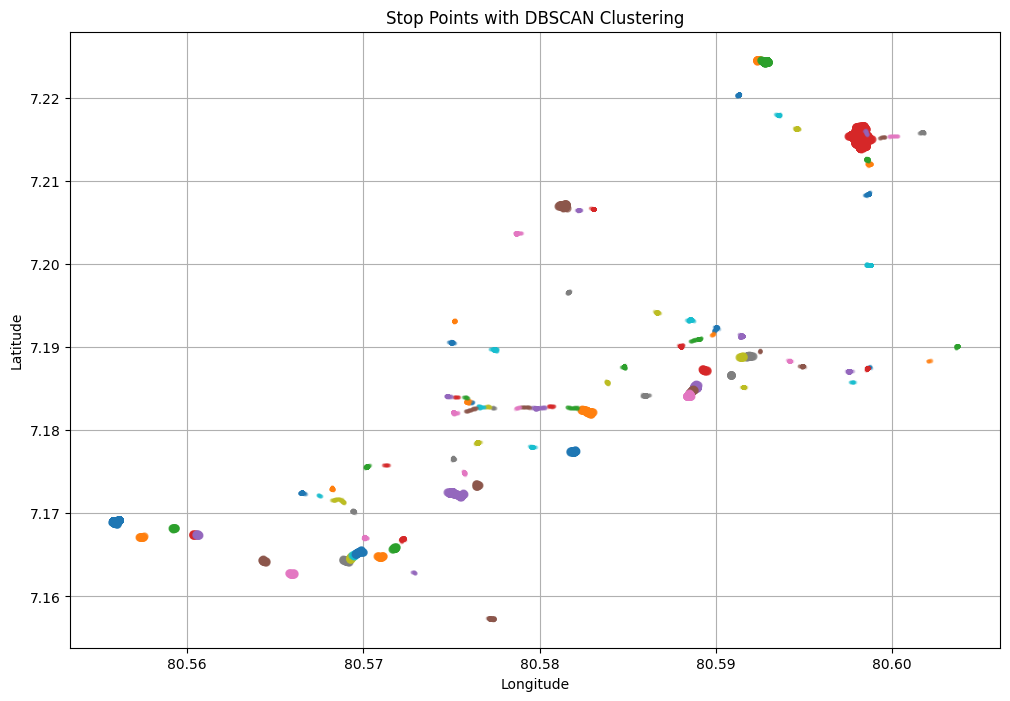

In [24]:
# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in unique_clusters:
    clustered_data = gps_data_unique[gps_data_unique['DBSCAN_Cluster'] == cluster]
    if cluster in stop_points['Cluster'].values:
        plt.plot(clustered_data['Longitude'], clustered_data['Latitude'], marker='o', markersize=5, linestyle='-', label=f'Stop Point {cluster}', alpha=0.6)
    else:
        plt.plot(clustered_data['Longitude'], clustered_data['Latitude'], marker='o', markersize=2, linestyle='-', label=f'Moving Point {cluster}', alpha=0.2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stop Points with DBSCAN Clustering')
plt.grid(True)
plt.show()

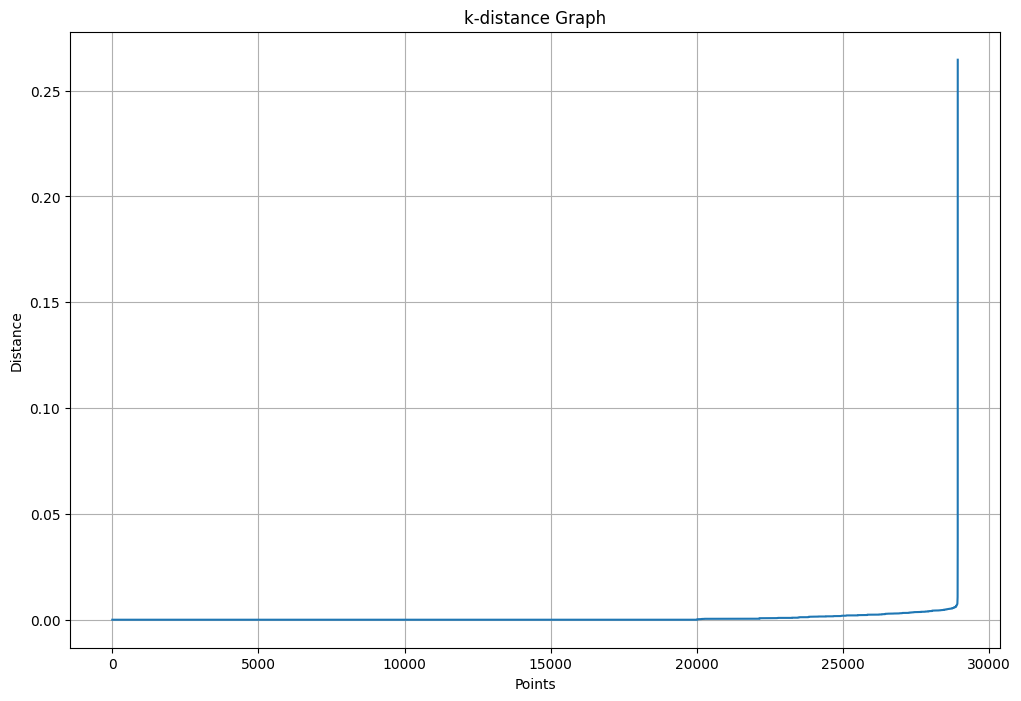

In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

features = gps_data_unique[['Longitude', 'Latitude']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Compute the k-nearest neighbors
k = 4  # Usually, 4 is a good starting point for min_samples
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(features_scaled)
distances, indices = nbrs.kneighbors(features_scaled)

# Sort and plot the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('k-distance Graph')
plt.grid(True)
plt.show()

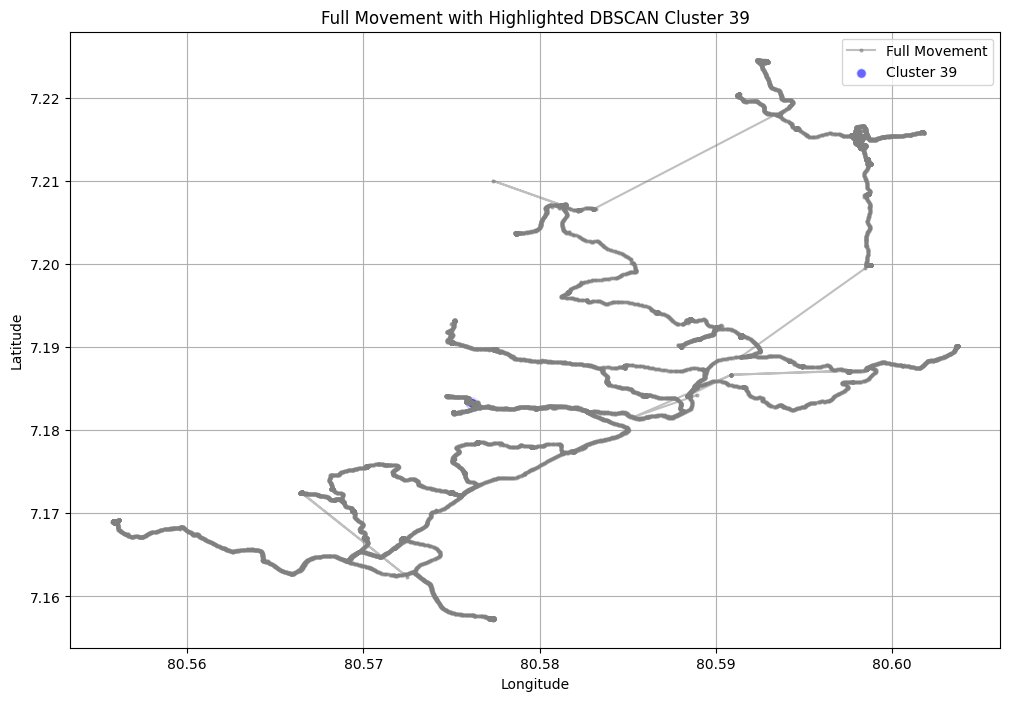

In [26]:
# Choose the specific cluster you want to visualize
cluster_to_visualize = 39  # Change this to the cluster number you want to visualize

# Filter data for the specific cluster
clustered_data = gps_data_unique[gps_data_unique['DBSCAN_Cluster'] == cluster_to_visualize]

# Plot the full movement path with the specific cluster highlighted
plt.figure(figsize=(12, 8))

# Plot all points to show full movement
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='grey', alpha=0.5, label='Full Movement')

# Highlight the specific cluster
plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], color='b', label=f'Cluster {cluster_to_visualize}', alpha=0.6, edgecolors='w', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Full Movement with Highlighted DBSCAN Cluster {cluster_to_visualize}')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances and time differences
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Next_DeviceTime'] = gps_data['DeviceTime'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)
gps_data['Time_Diff'] = (gps_data['Next_DeviceTime'] - gps_data['DeviceTime']).dt.total_seconds()

# Calculate speed in km/h
gps_data['Speed_kmh'] = gps_data['Distance_km'] / (gps_data['Time_Diff'] / 3600)

# Drop rows with NaN values
gps_data.dropna(subset=['Speed_kmh'], inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_13048\3737474561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\3737474561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\3737474561.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [64]:
# Group by cluster and calculate mean and median speed for each cluster
cluster_speed_analysis = gps_data_unique.groupby('DBSCAN_Cluster')['Speed_kmh'].agg(['mean', 'median']).reset_index()

# Display the speed analysis
print(cluster_speed_analysis)

    DBSCAN_Cluster       mean     median
0               -1  28.210329  26.684313
1                0   2.093457   0.000000
2                1  17.521559  17.790222
3                2  17.944935  17.086859
4                3  17.346769  16.383504
..             ...        ...        ...
92              91   7.785663   4.003017
93              92   3.445576   0.000000
94              93   3.005749   0.000000
95              94   7.619018   5.638910
96              95  16.891865  13.462362

[97 rows x 3 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_13048\1772124687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DBSCAN_Cluster', y='mean', data=cluster_speed_analysis, palette='viridis')


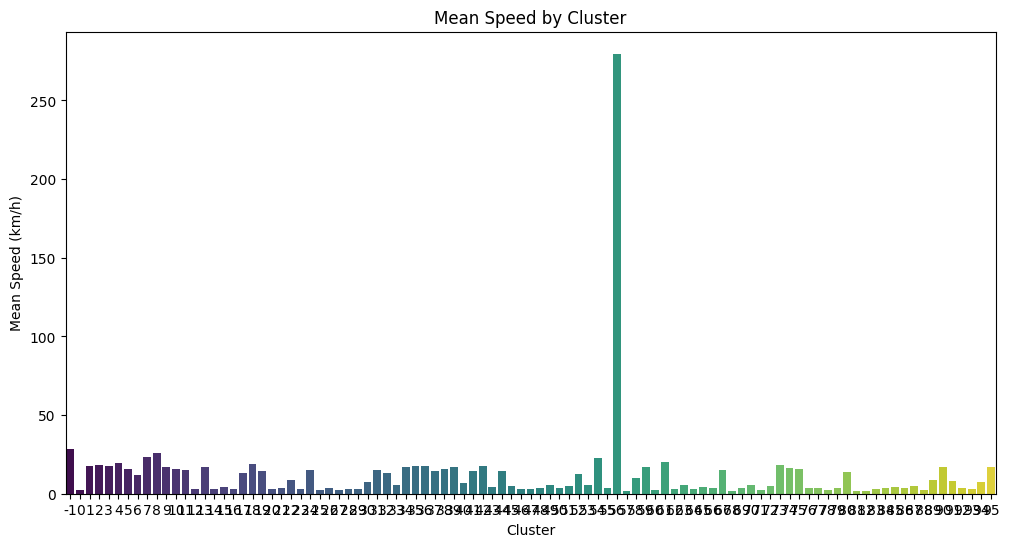

C:\Users\PC\AppData\Local\Temp\ipykernel_13048\1772124687.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DBSCAN_Cluster', y='median', data=cluster_speed_analysis, palette='viridis')


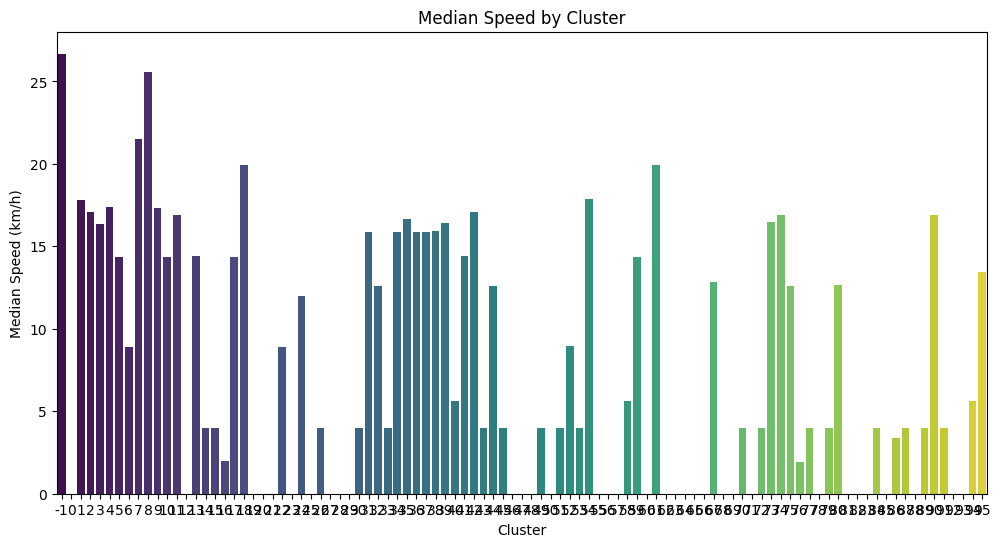

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for mean speed
plt.figure(figsize=(12, 6))
sns.barplot(x='DBSCAN_Cluster', y='mean', data=cluster_speed_analysis, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mean Speed (km/h)')
plt.title('Mean Speed by Cluster')
plt.show()

# Bar plot for median speed
plt.figure(figsize=(12, 6))
sns.barplot(x='DBSCAN_Cluster', y='median', data=cluster_speed_analysis, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Median Speed (km/h)')
plt.title('Median Speed by Cluster')
plt.show()

In [66]:
# Define a speed threshold to identify stop points (e.g., speed < 1 km/h)
speed_threshold = 1.0
stop_points = gps_data[gps_data['Speed_kmh'] < speed_threshold]


In [71]:
# Extract relevant features for clustering
features = stop_points[['Longitude', 'Latitude']]

# Apply DBSCAN Clustering with optimized parameters
dbscan = DBSCAN(eps=0.0001, min_samples=5)  # Adjust eps and min_samples based on your data
stop_points['Cluster'] = dbscan.fit_predict(features)


C:\Users\PC\AppData\Local\Temp\ipykernel_13048\114602460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_points['Cluster'] = dbscan.fit_predict(features)


C:\Users\PC\AppData\Local\Temp\ipykernel_13048\2918368448.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


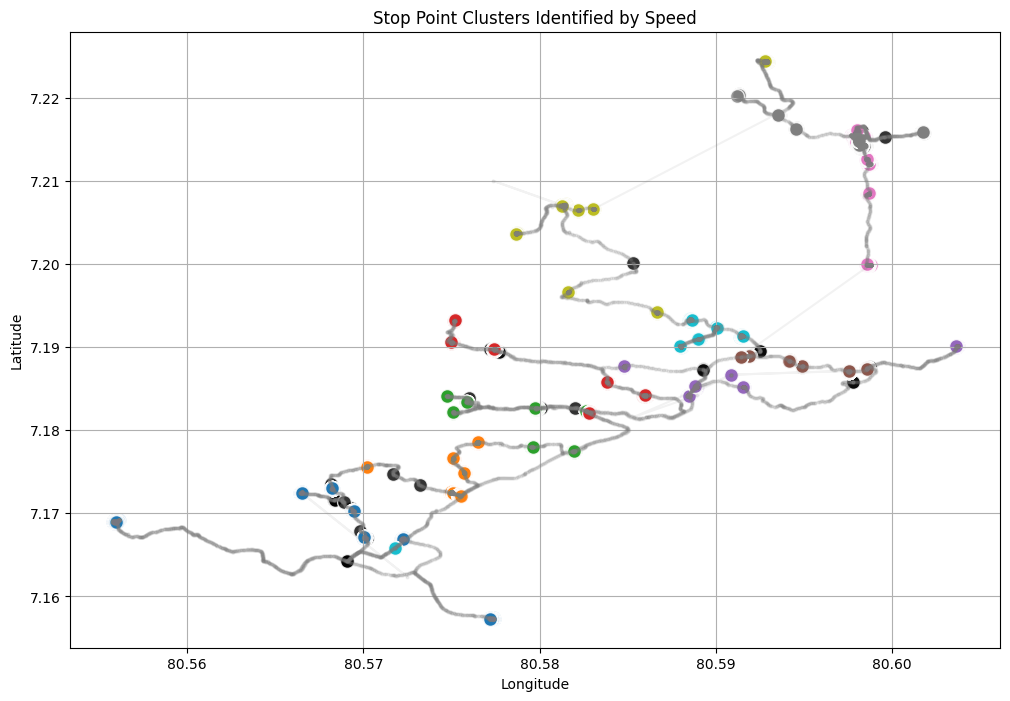

In [76]:
# Plot the full movement path and highlight stop point clusters
plt.figure(figsize=(12, 8))

# Plot all points to show full movement
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='grey', alpha=0.1, label='Full Movement')

# Plot each cluster with different colors
unique_clusters = stop_points['Cluster'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for cluster in unique_clusters:
    if cluster == -1:
        # Noise points
        color = 'k'
        label = 'Noise'
    else:
        color = colors(cluster)
        label = f'Cluster {cluster}'
    clustered_data = stop_points[stop_points['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], color=color, label=label, alpha=0.8, edgecolors='w', s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stop Point Clusters Identified by Speed')
plt.grid(True)
plt.show()


In [24]:
# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [91]:
# Function to calculate Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Radius of the Earth in km
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances and time differences
gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
gps_data['Next_DeviceTime'] = gps_data['DeviceTime'].shift(-1)
gps_data['Distance_km'] = gps_data.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)
gps_data['Time_Diff'] = (gps_data['Next_DeviceTime'] - gps_data['DeviceTime']).dt.total_seconds()

# Calculate speed in km/h
gps_data['Speed_kmh'] = gps_data['Distance_km'] / (gps_data['Time_Diff'] / 3600)

# Drop rows with NaN values
gps_data.dropna(subset=['Speed_kmh'], inplace=True)

# Define a speed threshold to identify stop points (e.g., speed < 1 km/h)
speed_threshold = 1.0
stop_points = gps_data[gps_data['Speed_kmh'] < speed_threshold]


# Extract relevant features for clustering
features = stop_points[['Longitude', 'Latitude']]

# Apply DBSCAN Clustering with optimized parameters
dbscan = DBSCAN(eps=0.0001, min_samples=5)  # Adjust eps and min_samples based on your data
stop_points['Cluster'] = dbscan.fit_predict(features)

# Initialize a list to store waiting times and distances for each cluster
cluster_data = []

# Iterate through each unique cluster
unique_clusters = stop_points['Cluster'].unique()
for cluster in unique_clusters:
    if cluster != -1:  # Exclude noise
        clustered_data = stop_points[stop_points['Cluster'] == cluster]
        waiting_time = (clustered_data['DeviceTime'].max() - clustered_data['DeviceTime'].min()).total_seconds()
        total_distance = clustered_data['Distance_km'].sum()
        cluster_data.append({'Cluster': cluster, 'WaitingTime_seconds': waiting_time, 'TotalDistance_km': total_distance})

# Convert to DataFrame for easier handling
cluster_data_df = pd.DataFrame(cluster_data)

# Display the waiting times and distances for each cluster
print(cluster_data_df)


# Calculate speed for each cluster
cluster_data_df['Speed_kmh'] = cluster_data_df['TotalDistance_km'] / (cluster_data_df['WaitingTime_seconds'] / 3600)

# Display the DataFrame with speed for each cluster
print(cluster_data_df)


C:\Users\PC\AppData\Local\Temp\ipykernel_13048\1921419185.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['Next_Longitude'] = gps_data['Longitude'].shift(-1)
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\1921419185.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_data['Next_Latitude'] = gps_data['Latitude'].shift(-1)
C:\Users\PC\AppData\Local\Temp\ipykernel_13048\1921419185.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

    Cluster  WaitingTime_seconds  TotalDistance_km
0         0              38974.0          0.002670
1         1                128.0          0.000000
2         2                729.0          0.001112
3         3                203.0          0.000000
4         4                169.0          0.000000
..      ...                  ...               ...
60       60                482.0          0.000000
61       61                 70.0          0.000000
62       62                196.0          0.000000
63       63                354.0          0.002471
64       64                  6.0          0.000000

[65 rows x 3 columns]
    Cluster  WaitingTime_seconds  TotalDistance_km  Speed_kmh
0         0              38974.0          0.002670   0.000247
1         1                128.0          0.000000   0.000000
2         2                729.0          0.001112   0.005491
3         3                203.0          0.000000   0.000000
4         4                169.0          0.000000   0.

C:\Users\PC\AppData\Local\Temp\ipykernel_13048\1921419185.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_points['Cluster'] = dbscan.fit_predict(features)


C:\Users\PC\AppData\Local\Temp\ipykernel_13048\901670929.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


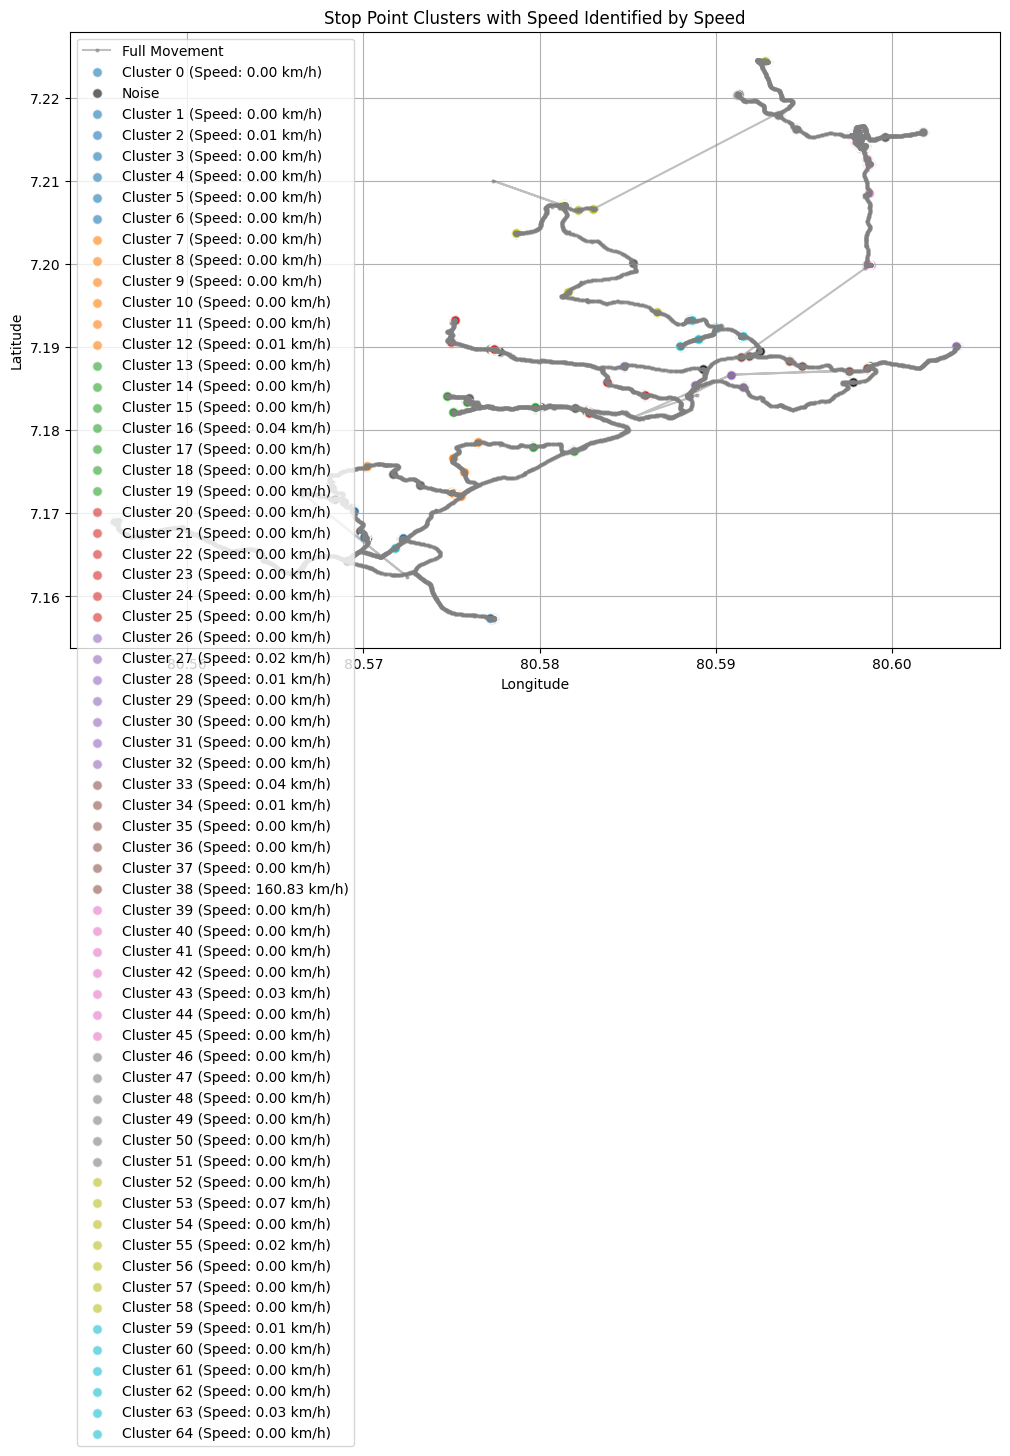

In [92]:
# Plot the full movement path and highlight stop point clusters
plt.figure(figsize=(12, 8))

# Plot all points to show full movement
plt.plot(gps_data['Longitude'], gps_data['Latitude'], marker='o', markersize=2, linestyle='-', color='grey', alpha=0.5, label='Full Movement')

# Plot each cluster with different colors
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for cluster in unique_clusters:
    if cluster == -1:
        # Noise points
        color = 'k'
        label = 'Noise'
    else:
        color = colors(cluster)
        label = f'Cluster {cluster} (Speed: {cluster_data_df[cluster_data_df["Cluster"] == cluster]["Speed_kmh"].values[0]:.2f} km/h)'
    clustered_data = stop_points[stop_points['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], color=color, label=label, alpha=0.6, edgecolors='w', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stop Point Clusters with Speed Identified by Speed')
plt.legend()
plt.grid(True)
plt.show()


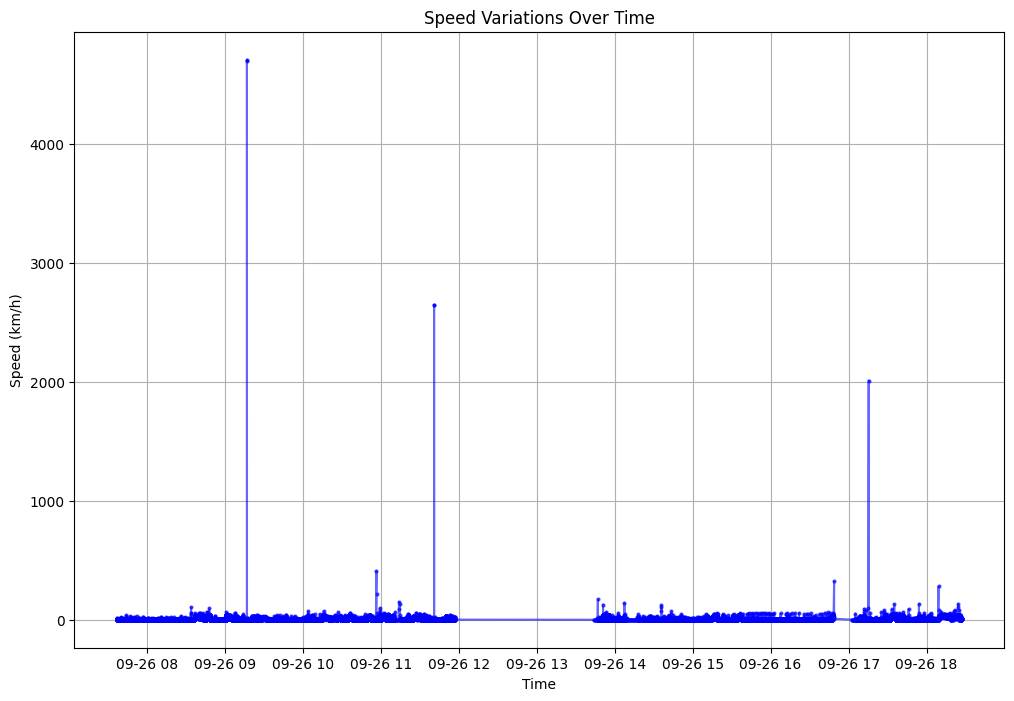

In [88]:
# # Ensure the 'TimeStamp' column is in datetime format
# gps_data_unique['DateTime'] = pd.to_datetime(gps_data_unique['TimeStamp'], unit='ms')

# Calculate time difference in seconds
gps_data_unique['Next_DateTime'] = gps_data_unique['DeviceTime'].shift(-1)
gps_data_unique['Time_Diff'] = (gps_data_unique['Next_DateTime'] - gps_data_unique['DeviceTime']).dt.total_seconds()

# Calculate distances using the Haversine formula
gps_data_unique['Next_Longitude'] = gps_data_unique['Longitude'].shift(-1)
gps_data_unique['Next_Latitude'] = gps_data_unique['Latitude'].shift(-1)
gps_data_unique['Distance_km'] = gps_data_unique.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Calculate speed in km/h
gps_data_unique['Speed_kmh'] = (gps_data_unique['Distance_km'] / gps_data_unique['Time_Diff']) * 3600

# Remove infinite values and NaNs that might result from division by zero or missing data
gps_data_unique.replace([np.inf, -np.inf], np.nan, inplace=True)
gps_data_unique.dropna(subset=['Speed_kmh'], inplace=True)

# Plot the speed variations
plt.figure(figsize=(12, 8))
plt.plot(gps_data_unique['DeviceTime'], gps_data_unique['Speed_kmh'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.title('Speed Variations Over Time')
plt.grid(True)
plt.show()

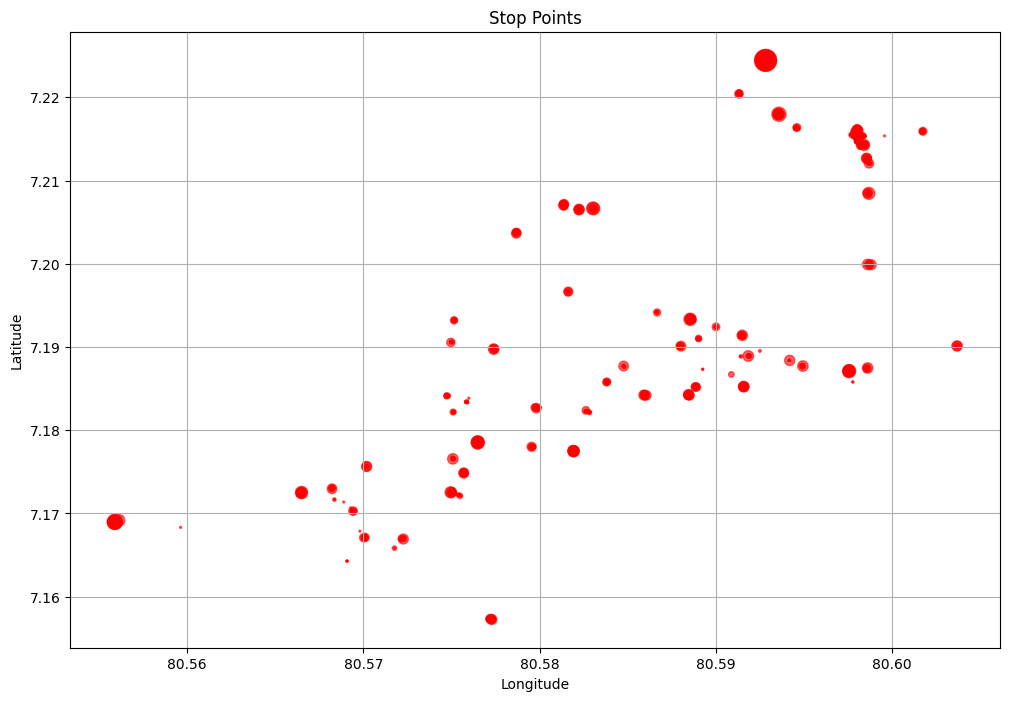

In [29]:
# Define a threshold for considering a stop (e.g., speed < 1 km/h)
stop_threshold = 1.0
gps_data_unique['Is_Stop'] = gps_data_unique['Speed_kmh'] < stop_threshold

# Aggregate data to find stop points
stop_points = gps_data_unique[gps_data_unique['Is_Stop']].groupby(['Longitude', 'Latitude']).size().reset_index(name='Stop_Count')

# Plot the stop points
plt.figure(figsize=(12, 8))
plt.scatter(stop_points['Longitude'], stop_points['Latitude'], s=stop_points['Stop_Count']*2, color='r', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stop Points')
plt.grid(True)
plt.show()

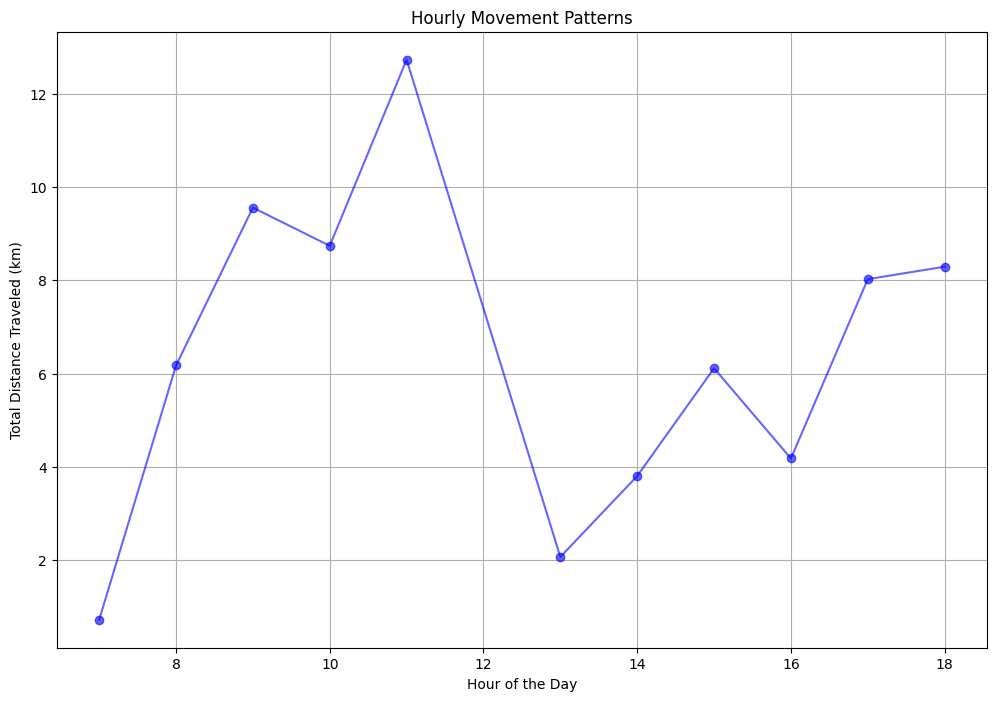

In [30]:
# Extract hour information
gps_data_unique['Hour'] = gps_data_unique['DeviceTime'].dt.hour

# Aggregate data by hour
hourly_data = gps_data_unique.groupby('Hour').agg({'Distance_km': 'sum'}).reset_index()

# Plot the hourly distance traveled
plt.figure(figsize=(12, 8))
plt.plot(hourly_data['Hour'], hourly_data['Distance_km'], marker='o', linestyle='-', color='b', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance Traveled (km)')
plt.title('Hourly Movement Patterns')
plt.grid(True)
plt.show()

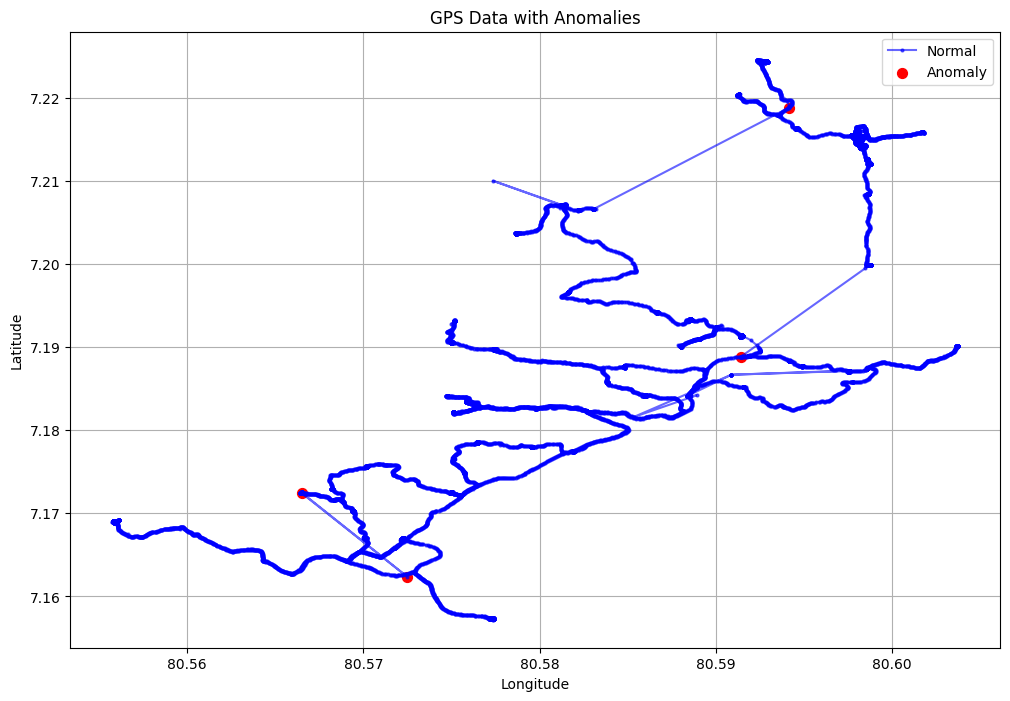

               DeviceTime  Longitude  Latitude  Cluster  DBSCAN_Cluster  \
5721  2023-09-26 09:17:06   80.56649   7.17251        2               0   
5722  2023-09-26 09:17:07   80.57249   7.16236        2               0   
14718 2023-09-26 11:57:28   80.59142   7.18887        0               0   
24305 2023-09-26 16:48:54   80.59414   7.21886        1               2   

            Next_DateTime  Time_Diff  Next_Longitude  Next_Latitude  \
5721  2023-09-26 09:17:07        1.0       80.572490        7.16236   
5722  2023-09-26 09:17:08        1.0       80.566475        7.17248   
14718 2023-09-26 13:44:21     6413.0       80.598760        7.19995   
24305 2023-09-26 17:02:23      809.0       80.583050        7.20664   

       Distance_km    Speed_kmh  Is_Stop  Hour  Anomaly  
5721      1.308430  4710.346870    False     9     True  
5722      1.306393  4703.015534    False     9     True  
14718     1.474316     0.827622     True    11     True  
24305     1.828397     8.136252    F

In [31]:
# Calculate distances between consecutive points
gps_data_unique['Next_Longitude'] = gps_data_unique['Longitude'].shift(-1)
gps_data_unique['Next_Latitude'] = gps_data_unique['Latitude'].shift(-1)
gps_data_unique['Distance_km'] = gps_data_unique.apply(lambda row: haversine(row['Longitude'], row['Latitude'], row['Next_Longitude'], row['Next_Latitude']), axis=1)

# Identify anomalies (e.g., distance > 1 km in a short time interval)
distance_threshold = 1.0  # 1 km
gps_data_unique['Anomaly'] = gps_data_unique['Distance_km'] > distance_threshold

# Plot the anomalies
plt.figure(figsize=(12, 8))
plt.plot(gps_data_unique['Longitude'], gps_data_unique['Latitude'], marker='o', markersize=2, linestyle='-', color='b', alpha=0.6, label='Normal')
plt.scatter(gps_data_unique[gps_data_unique['Anomaly']]['Longitude'], gps_data_unique[gps_data_unique['Anomaly']]['Latitude'], color='r', s=50, label='Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Data with Anomalies')
plt.legend()
plt.grid(True)
plt.show()

# Display the anomalies in a table
anomalies = gps_data_unique[gps_data_unique['Anomaly']]
print(anomalies.head())

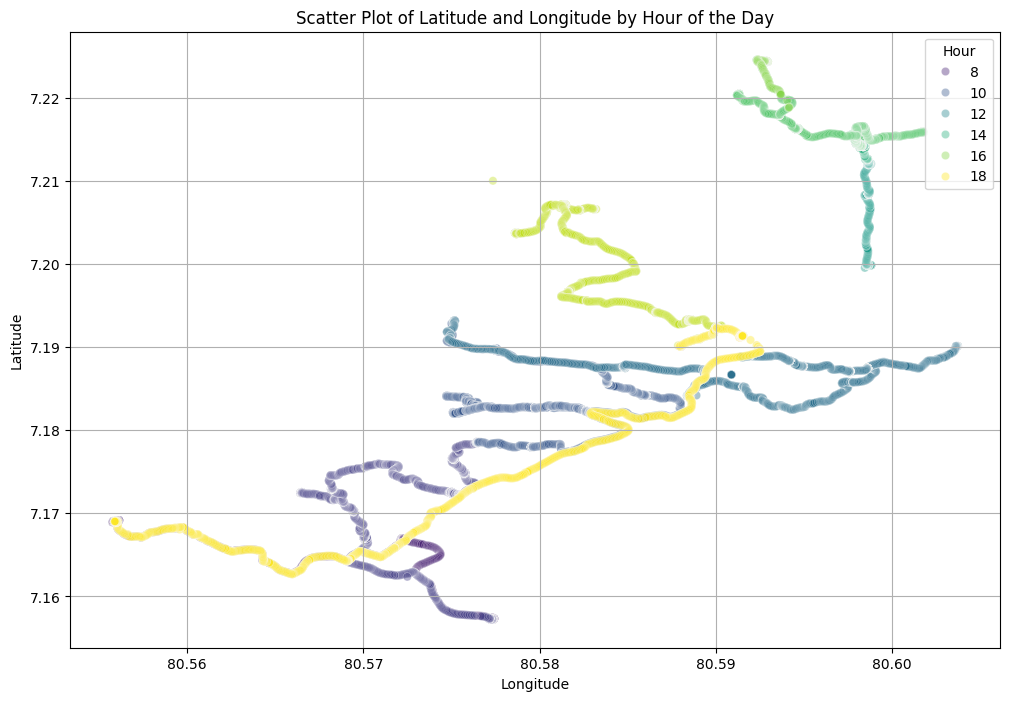

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gps_data_unique, x='Longitude', y='Latitude', hue='Hour', 
                palette='viridis',marker='o', alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude and Longitude by Hour of the Day')
plt.legend(title='Hour')
plt.grid(True)
plt.show()